In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Z-transformasjon del 2

* **Emne AIS2102 - Dynamiske System**
* **Uke 7, 2025**
* **Underviser: Kai Erik Hoff**

## Tema:
* Repetisjon Z-transformasjon del 1
    * Z-transformen
    * Transferfunksjon
    * Fra z-plan til frekvensrespons
    * Grafisk fremstilling av transferfunksjon
* Poler og nullpunkt
    * Nullpunkt
    * Poler
    * Pol- og Nullpunktskart
    * Stabilitet
    * Mer om poler og frekvensrespons

# Repetisjon: Z-transformasjon
#### Notasjon:
$$\textbf{Z}(h[k]) = H(z)$$

#### Formel definisjon:
\begin{align}
H(z) &= \sum_{k=0}^{\infty} h[k]\cdot z^{-k}\\
& \text{der}\\
z &= r\cdot e^{j\hat{\omega}}
\end{align}

#### For LTI-system
* Dersom $h[k]$ er impulsresponsen til et LTI-system, forteller dette hvordan systemet vil respondere til et inngangssignal $u[k] = z^{k} = r^{k} \cdot e^{j \hat{\omega}\cdot k}$.
* Refleksjoner:
    * Dersom $|r| = 1$, leser vi av *frekvensresponsen* til systemet. 
    * Dersom $|r| > 1$, vil amplitudent til $z^{k}$ øke over tid.
    * Dersom $|r| < 1$, vil amplituden til $z^{k}$ synke over tid.

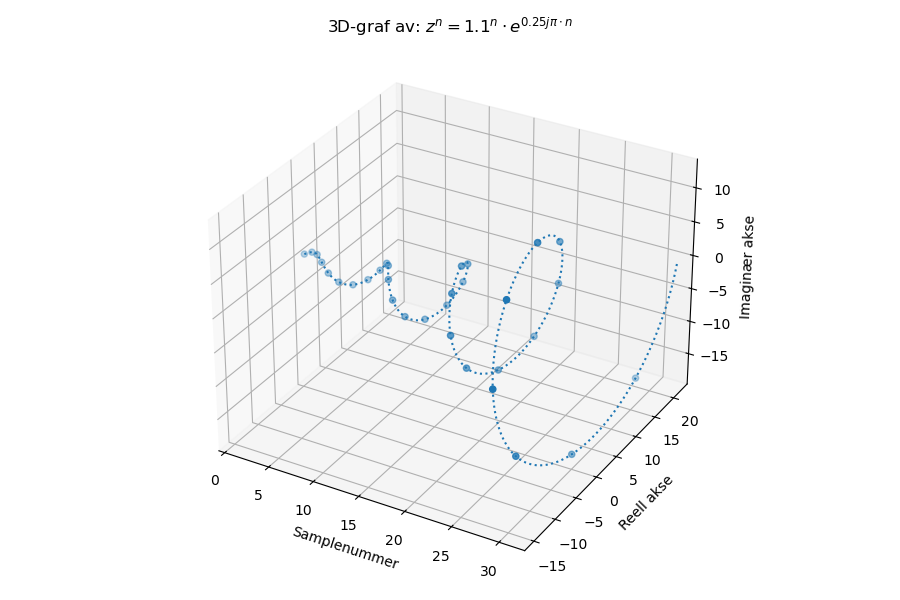

In [4]:
from demos import showDiscreteOscillation
z = 1.1*exp(1j*pi/4)
showDiscreteOscillation(z, N=32, fig_num = 1)

# Repetisjon: S-plan og Z-plan
## $$z = e^{s\cdot T_s}$$
<img src="Figurer/z_transform/s_to_z.svg" style="width: 80%; margin-left: 100px" />

# Repetisjon: Tidsforskyvning i Z-planet

* Hver sample tidsforskyvning tilsvarer multiplikasjon med $z^{-1}$ i z-planet. 
$$\textbf{Z}(x[n-D]) = z^{-D}\cdot X(z)$$

* I blokkskjemarepresentasjon av filter brukes derfor $z^{-1}$ for å symbolisere tidsforskyvning/delay.

<br>
<img src="Figurer/z_transform/unit_delay.svg" style="width: 70%; margin-left: 100px" />

# Repetisjon: Transferfunksjon / overføringsfunksjon

* Z-transformen av impulsresponen $h[n]$ til et LTI-system kalles systemets *transferfunksjon*
* For ethvert kausalt LTI-system med filterkoeffisienter **a** og **b**, vil transferfunksjonen være:
\begin{align}
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M} b_k \cdot z^{-k}}{\sum_{k=0}^{N} a_k \cdot z^{-k}}\\
&\text{eller}\\
&= \frac{b_0 + b_1\cdot z^{-1} + b_2 \cdot z^{-2} + \ldots + b_M \cdot z^{-M}}{a_0 + a_1\cdot z^{-1} + a_2 \cdot z^{-2} + \ldots + a_N \cdot z^{-N}}
\end{align}
* Teller og nevner er polynomer
* *samme utledning som for DTFT av differanseligning*

# Repetisjon: Visualisering av $H(z)$

* $H(z)$ funksjon av et komplekst tall.
    * "Gain" i transferfunksjonen av størst interesse
    * Et "Surface Plot" av $|H(z)|$ vil kunne gi informasjon om forsterkningen av ulike typer signal.
    * Amplituderesponsen vil kunne leses av ved å studere konturene langs enhetssirkelen.
    * For enkelte verdier av $z$ ser vi at overflateplottet trekkes opp mot uendelig, eller ned mot null.
        * Disse punktene er kjent som poler og nullpunkt

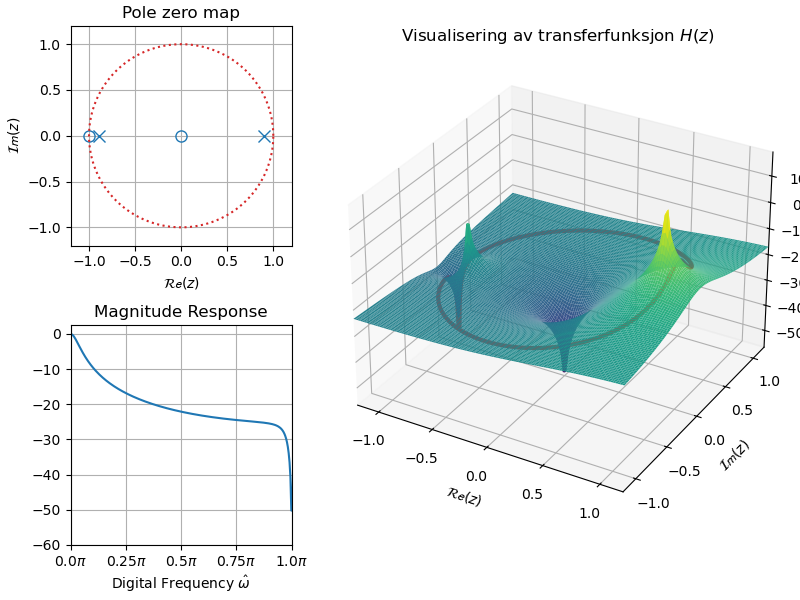

In [7]:
from demos import visualizeTF
# Eksempelfilter middelverdi med vindusfunksjon
b = np.array([1, 1])*0.1
a = [1, 0, -0.8]
visualizeTF(b, a, fig_num=2) # Ikke standardfunksjon, definert i kildekoden til forelesningen.

# Poler og nullpunkt
* $H(z)$ kan alternativt skrives på følgende form:
$$H(z) = \frac{z^M\cdot b_0 + z^{M-1}\cdot b_1 + \cdots + b_M}{z^N\cdot a_0 + z^{N-1}\cdot a_1 + \cdots + a_N}\cdot z^{N-M}$$
### Nullpunkt:
* Verdier av $z$ der:
$$
\begin{align}
H(z) &= 0\\
\text{dvs:} &\downarrow\\
{z^M\cdot b_0 + z^{M-1}\cdot b_1 + \cdots + b_M} &= 0
\end{align}
$$
* Å løse ligningen med hensyn på $z$ gir $M$ mulige løsninger i nullpunktene $z_k \in \{z_1, z_2, \ldots, z_M\}$
    * NB! Dersom $N>M$, vil vi også ha $N-M$ nullpunkt i $z=0$.

# Poler og nullpunkt
* $H(z)$ kan alternativt skrives på følgende form:
$$H(z) = \frac{z^M\cdot b_0 + z^{M-1}\cdot b_1 + \cdots + b_M}{z^N\cdot a_0 + z^{N-1}\cdot a_1 + \cdots + a_N}\cdot z^{N-M}$$
### Poler:
* Verdier av $z$ der:
$$
\begin{align}
\lim_{z\rightarrow p} \left( |H(z)|\right) &= \infty\\
\text{dvs:} &\downarrow\\
{z^N\cdot a_0 + z^{N-1}\cdot a_1 + \cdots + a_N} &= 0
\end{align}
$$
* Å løse ligningen med hensyn på $z$ gir $N$ mulige løsninger i polene $z_k \in \{p_1, p_2, \ldots, p_N\}$
    * NB! Dersom $N<M$, vil vi også ha $M-N$ poler i $z=0$.

# Stabilitet

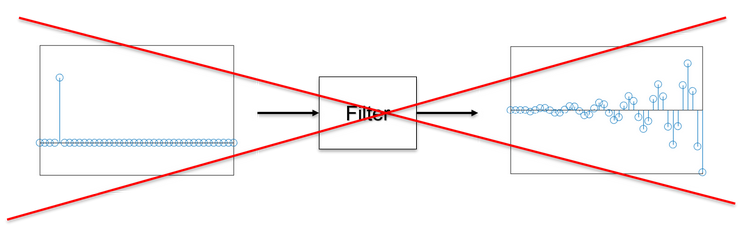

* Definisjon i tidsdomenetdomenet ($t/k$): 
    * Et system som påtrykkes et inngangssignal $u[k]$ som er avgrenset mellom to definerbare maks- og minimumsverdier, skal også ha et utgangssignal $y[k]$ som er avgrenset mellom to definerbare maks- og minimumsverdier.
        * Impulsresponsen $h[k]$ til et stabilt filter vil konvergere mot 0, og impulsresponsen til et ustbailt filter vil divergere.
* Definisjon av stabilitet i z-domenet:
    * Et filter er stabilt dersom alle filterets poler befinner seg innenfor enhetssirkelen.
    * Et filter er såkalt "marginalt stabilt" dersom det har poler ***på*** enhetssirkelen
    * Et filter er ustabilt dersom det har poler utenfor enhetssirkelen

## Kodeillustrasjon: Impulsrespons andreordens IIR-filtre
* Ser på følgende:
    1. Impulsrespons for et system med to poler i $z=0.9\cdot e^{\pm j\cdot \frac{\pi}{8}}$
    2. Impulsrespons for et system med to poler i $z=1.0\cdot e^{\pm j\cdot \frac{\pi}{8}}$
    3. Impulsrespons for et system med to poler i $z=1.1\cdot e^{\pm j\cdot \frac{\pi}{8}}$

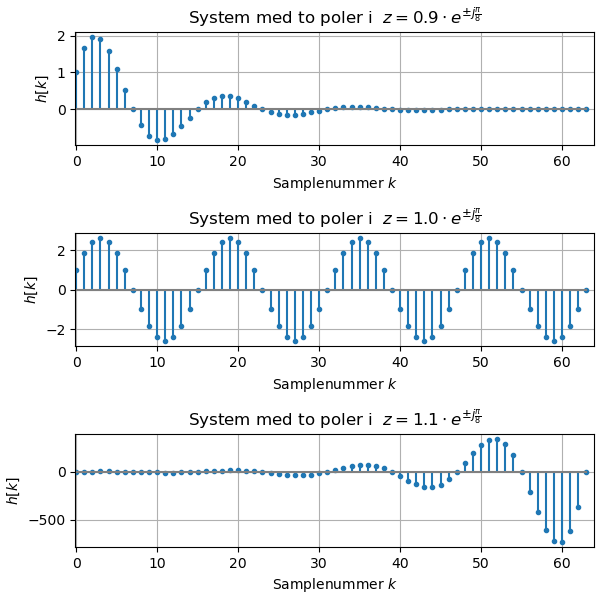

In [8]:
xk = np.zeros(64)
xk[0] = 1


r = [0.9, 1.0, 1.1] # Array med radius for polkoordinater innenfor, på & utenfor enhetssirkelen.

plt.close(4); plt.figure(4, figsize=(6,6))
for i in np.arange(3):
    plt.subplot(3,1,i+1)
    poles = r[i]*exp(1j*np.array([pi/8, -pi/8])) 
    b = [1]
    a = np.real(np.poly(poles))
    hk = sig.lfilter(b, a, xk)
    plt.stem(hk, markerfmt=".", basefmt="grey")
    plt.xlim([-0.1, len(xk)])
    plt.grid(True)
    plt.xlabel('Samplenummer $k$')
    plt.ylabel(r'$h[k]$')
    plt.title(r"System med to poler i  $z = "+str(r[i])+r"\cdot e^{\pm j \frac{\pi}{8}}$")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Regneeksempel 1:

1. Et tidsdiskret system har transferfunksjonen 
$$H(z) = \frac{1 - z^{-1}+ z^{-2}}{1+0.7\cdot z^{-1}+0.49\cdot z^{-2}}$$
Finn filterets poler og nullpunkt, og skisser de i et pol- og nullpunktskart
2. Avgjør om systemet er stabilt

# Pol- og nullpuntkskart, 1. ordens system
<img src="Figurer/14_Ztransform/PZ_lecture/Slide5.PNG" style="width: 70%" align="left" />

# Pol- og nullpunktskart 2. ordens system
<img src="Figurer/14_Ztransform/PZ_lecture/Slide6.PNG" style="width: 70%" align="left"/>

# Poler og nullpunkt til transferfunksjon
* Faktorisering av transferfunksjonen gir:
$$H(z) = \frac{b_0}{a_0}\cdot \frac{(z-z_1)(z-z_2)\cdots(z-z_M)}{(z-p_1)(z-p_2)\cdots(z-p_N)}\cdot z^{N-M}$$
    * Her vil $\frac{b_0}{a_0}$ være et reelt tall som "skalerer" transferfunksjonen.
    * $z_k$ angir filterets mulige nullpunkt for $k\in \{1 \ldots M\}$
    * $p_k$ angir filterets mulige poler for $k \in \{1 \ldots N\}$
    
* Differanseligningen til et system kan utledes fra et sett med poler og nullpunkt
* Systemets egenskaper kan tydes fra et sett med pol- og nullpunktskoordinater.

# Z-plan og frekvensrespons

* Substitusjonen $z=e^{j\hat{\omega}}$ i transferfunksjonen $H(z)$ gir systemets frekvensrespons $H(\hat{\omega})$.

$$ H(\hat{\omega}) = H(z)\bigg|_{z = e^{j\hat{\omega}}}$$

* Frekvensresponsen er oppgitt langs ***enhetssirkelen*** i z-planet.
    * Sirkulær "frekvensakse" medfører at alle aliaser av et digitalt signal er representert av samme punkt i z-planet.
    
<img src="Figurer/14_Ztransform/Fig11_Hz2Hw.png" style="width: 90%" />

## Demo frekvensrespons

Output()

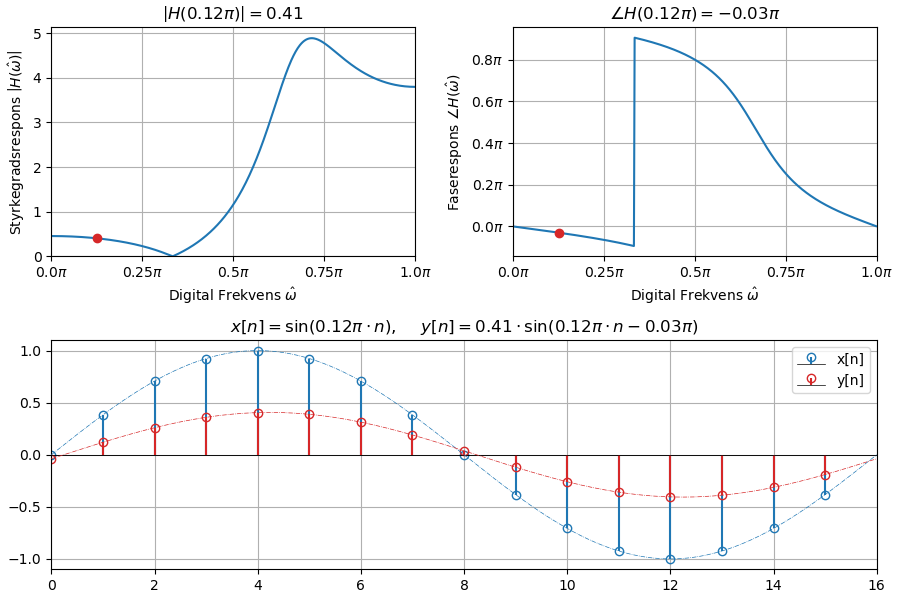

In [11]:
from demos import FreqRespDemo
b = np.array([1, -1, 1])
a = np.array([1, 0.7, 0.49])
FreqRespDemo(b, a, figsize=(9,6));

# Frekvensrespons og sinuspåtrykk

$$u[k] = \cos (\omega_0 \cdot k)$$

$$y[k] = |H(\omega_0)| \cdot \cos(\omega_0 \cdot k + \angle H(\omega_0))$$

## Regneeksempel 2:

1. Et filter har transferfunksjonen 
$$H(z) = \frac{1 - z^{-1}+ z^{-2}}{1+0.7\cdot z^{-1}+0.49\cdot z^{-2}}$$
Finn et uttrykk for frekvensresponsen $H(\hat{\omega})$
2. Hva blir $y[k]$ når $u[k]=\cos\left(\frac{\pi}{2}\cdot k\right)$ ?
3. Bruk MATLAB til å tegne et plot av frekvensresponsen i lineær skala. Verifiser at utregningen i del 2 er korrekt

In [10]:
H = 1j/(0.51 - 0.7j)
abs(H), np.angle(H, deg=True)

(1.154623566040508, np.float64(143.9239884436314))

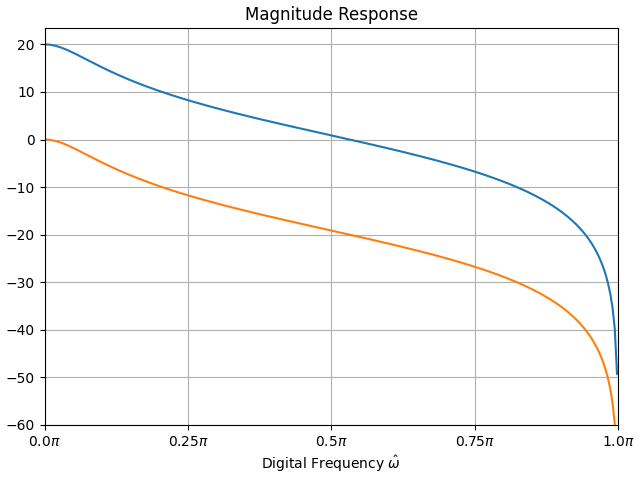

In [4]:
b = np.array([1, 1])
a = np.array([1, -0.8])
plt.close(6); plt.figure(6)
Magnitude_dB(b, a)
Magnitude_dB(0.1*b, a)

# Poler, nullpunkt og frekvensrespons
<img src="Figurer/14_Ztransform/PZ_lecture/Slide10.PNG" style="width: 70%" align="left"/>

## Illustrasjon
<img src="Figurer/14_Ztransform/PZ_lecture/Slide11.PNG" style="width: 80%" align="left"/>


## Kodeeksempel: Frihåndsdesign av system

/home/jovyan/AIS2102_Diskretisering/demos/ZTrans.py:49: RuntimeWarning: divide by zero encountered in log10
  ax.plot(x_w, y_w, 20*np.log10(np.abs(Hw)), linewidth=3, color='tab:red')
/home/jovyan/AIS2102_Diskretisering/demos/ZTrans.py:81: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20*np.log10(np.abs(Hw)))
/opt/conda/lib/python3.12/site-packages/mpl_toolkits/mplot3d/proj3d.py:150: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0] / w, vecw[1] / w, vecw[2] / w


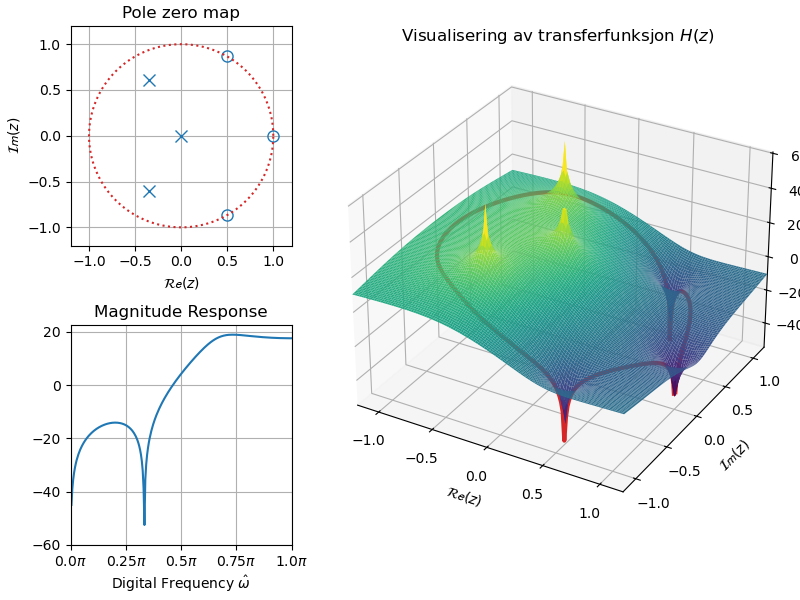

In [14]:
zeroes = np.array([exp(1j*pi/3), exp(-1j*pi/3), 1])

poles = np.array([0.7*exp(2j*pi/3), 0.7*exp(-2j*pi/3)])

b, a = sig.zpk2tf(zeroes, poles, 1)
visualizeTF(b, a, fig_num=5)

# Quiz:
<img src="Figurer/14_Ztransform/PZ_lecture/Slide17.PNG" style="width: 90%" align="left"/>

## Regneeksempel 3:

1. Finn koeffisientene til *lavpasfilteret* med poler og nullpunkt som følger:
$$\begin{align} z_k &\in \{-1, -j, j\}\\
p_k &\in \left\{0.7\cdot e^{j\frac{\pi}{3}}, 0.7\cdot e^{-j\frac{\pi}{3}}\right\}
\end{align}$$

2. Juster filterkoeffisientene slik at vi får følgende filtergain i $\hat{\omega}=0$:
$$H(\hat{\omega})\big|_{\hat{\omega}=0} = 1$$

b =  [1. 1. 1. 1.] 
a =  [ 1.   -0.7   0.49] K =  1


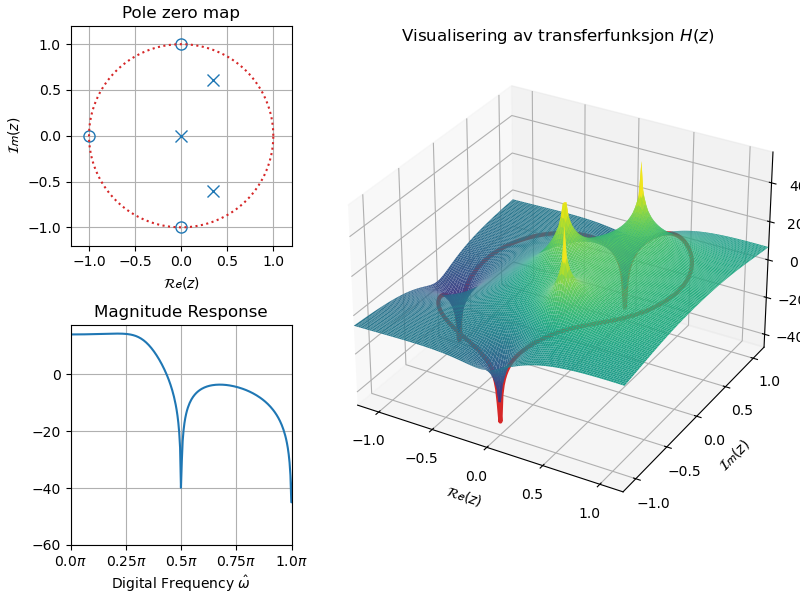

In [17]:
zeroes = np.array([-1.0,
                   1j,
                   -1j])

poles = np.array([0.7*exp(1j*pi/3),
                  0.7*exp(-1j*pi/3)
                 ])

w_0 = 0 # Rad/sample
z_0 = 1*np.exp(1j*w_0)


b, a = sig.zpk2tf(zeroes, poles, 1)

visualizeTF(b, a, fig_num=4)
print("b = ", b, "\na = ", a, "K = ", 1)

# Statespace og transferfunksjoner

* Tidsdiskret statespace til transferfunksjon $H(z)$:

$$
\begin{align}
x[k+1] &= A\cdot x[k] + B\cdot u[k] \\
y[k] &= C\cdot x[k] + D \cdot u[k] \\ 
 & \\
H(z) &= C\left(zI - A^{-1}\right)B + D
\end{align}
$$

* Samme formel som tidskontinuerlig statespace til transferfunksjon, bare med $z$ istedenfor $s$.

# Tilstandsrom med $z$-notasjon

$$
\begin{align}
x[k+1] &= A\cdot x[k] + B\cdot u[k] \\
y[k] &= C\cdot x[k] + D \cdot u[k] \\ 
&\Downarrow \\
z\cdot \mathbf{X}(z) &= \mathbf{A}\cdot \mathbf{X}(z) + \mathbf{B}\cdot \mathbf{U}(z) \\
\mathbf{Y}(z) &= \mathbf{C}\cdot \mathbf{X}(z) + \mathbf{D} \cdot \mathbf{U}(z) \\ 
 & \\
\mathbf{H}(z) &= \mathbf{C}\left(z\mathbf{I} - \mathbf{A}^{-1}\right)\mathbf{B} + \mathbf{D}
\end{align}
$$

# Generell prosedyre for diskretisering

1. Sett opp tilstandsrom-modell med laplace-operator $s$:
$$
\begin{align}
s\cdot \mathbf{X}(s) &= \mathbf{A}\cdot \mathbf{X}(s) + \mathbf{B}\cdot \mathbf{U}(s) \\
\mathbf{Y}(s) &= \mathbf{C}\cdot \mathbf{X}(s) + \mathbf{D} \cdot \mathbf{U}(s) \\
\end{align}
$$

2. Finn en funksjon $f(z)$ som er en approksimasjon av $s$:
    * Eksempel:
$$s \approx \frac{z-1}{T_s} \ \ \ \textit{(Eulers metode)}$$  


3. Substituer $s$ med $f(z)$ i tilstandsrom-modellen, og skriv om systemet til det blir en diskrét tilstandsrommodell
    * Eksempel:
$$
\begin{align}
\frac{z-1}{T_s}\cdot \mathbf{X}(z) &= \mathbf{A}\cdot \mathbf{X}(z) + \mathbf{B}\cdot \mathbf{U}(z) \\
\mathbf{Y}(z) &= \mathbf{C}\cdot \mathbf{X}(z) + \mathbf{D} \cdot \mathbf{U}(z) \\
&\Downarrow \\
z \cdot \mathbf{X}(z) &= (\mathbf{I} + T_s\cdot \mathbf{A})\cdot \mathbf{X}(z) + T_s\cdot \mathbf{B}\cdot \mathbf{U}(z) \\
\mathbf{Y}(z) &= \mathbf{C}\cdot \mathbf{X}(z) + \mathbf{D} \cdot \mathbf{U}(z) \\
\end{align}
$$

# Spørsmål?